In [1]:
# Loading needed libraries
#import math
#from math import sqrt, sin, pi
#import numpy as np
import matplotlib.pyplot as plt

# Constants
P_load = 12  # Load in Newtons per mm
EYoung = 210000  # Young's Modulus in Pascals (N/mm^2)
beamLength = 5000  # Length of the beam in mm


In [2]:
def beam_properties(h, b, tw, tf):
    """
    Calculate the cross-sectional area and moment of inertia Iy for an I- or H-type steel beam.

    Parameters:
    h (int, float): Beam height in mm
    b (int, float): Beam width in mm
    tw (int, float): Web width in mm
    tf (int, float): Flange width in mm

    Returns:
    tuple: Cross-sectional area (A) in mm^2 and moment of inertia (Iy) in mm^4
    """
    # Calculate cross-sectional area (A)
    # Area of two flanges + Area of the web
    A = 2 * (b * tf) + (h - 2 * tf) * tw
    
    # Calculate Moment of Inertia Iy
    # Iy of entire rectangle - Iy of cutout rectangle
    Iy = (b * h**3 - (b - tw) * (h - 2 * tf)**3) / 12
    
    return A, Iy

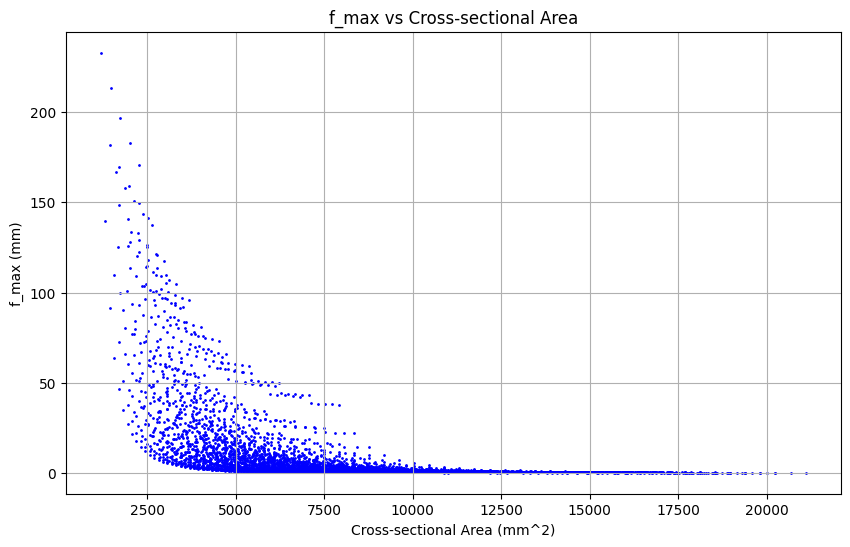

In [3]:
# Arrays to store results
areas = []
f_max_values = []

# Generate all combinations and calculate properties
# Loops allow us to iterate over a sequence (e.g., a list or a range of numbers).
# In this case, we use nested loops to iterate through all combinations of h, b, tw, and tf.

for h in range(100, 900, 25):  # Loop over height values from 25 to 100
    for b in range(75, 220, 25):  # Loop over base values from 25 to 100
        for tw in range(5, 20, 3):  # Loop over web thickness values from 1 to 25
            for tf in range(5, 20, 3):  # Loop over flange thickness values from 1 to 25
                # Calculate the cross-sectional area (A) and second moment of area (Iy) using the beam_properties function
                A, Iy = beam_properties(h, b, tw, tf)
                
                # Convert Iy from mm^4 to m^4 for consistent units in the calculations
                #Iy_m4 = Iy * 1e-12  # 1 mm^4 = 1e-12 m^4
                
                # Calculate the maximum deflection (f_max) using the formula
                f_max = (5 * P_load * beamLength**4) / (384 * EYoung * Iy)
                
                # Append the calculated area (A) to the areas list
                areas.append(A)
                
                # Append the calculated maximum deflection (f_max) to the f_max_values list
                f_max_values.append(f_max)

                # # Append the calculated area (A) to the areas list if f_max is under 20
                # if f_max < 20:
                #     areas.append(A)
                #     f_max_values.append(f_max)

# Plotting
plt.figure(figsize=(10, 6))  # Create a figure with a specified size
plt.scatter(areas, f_max_values, s=1, color='blue')  # Create a scatter plot of areas vs f_max_values
plt.xlabel('Cross-sectional Area (mm^2)')  # Label for the x-axis
plt.ylabel('f_max (mm)')  # Label for the y-axis
plt.title('f_max vs Cross-sectional Area')  # Title of the plot
plt.grid(True)  # Enable grid for better readability
plt.show()  # Display the plot
#1-100 1-25 ran in 21.5s

In [4]:
##Try yourself to create a function that calculates the maximum deflection and call it in the above code

# Function to calculate f_max
def calculate_f_max(P_load, beamLength, EYoung, Iy):
    Iy_m4 = Iy * 1e-12  # Convert mm^4 to m^4
    f_max = (5 * P_load * beamLength**4) / (384 * EYoung * Iy_m4)
    return f_max

Replotting for f_max < 20mm